In [151]:
from openbb_terminal.sdk import openbb
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
currency_pair = openbb.forex.load(
    from_symbol='GBP',
    to_symbol='USD',
    start_date = '2023-07-31',
    end_date = '2023-08-04',
    interval = '1min')

currency_pair = currency_pair.drop(columns=['Volume'], axis=1)

display(currency_pair.head(10))
display(currency_pair.tail(10))

,Open,High,Low,Close,Adj Close
date,,,,,
2023-07-31 00:00:00,1.285512,1.285512,1.285512,1.285512,1.285512
2023-07-31 00:01:00,1.285413,1.285413,1.285413,1.285413,1.285413
2023-07-31 00:02:00,1.285512,1.285512,1.285512,1.285512,1.285512
2023-07-31 00:03:00,1.285463,1.285463,1.285463,1.285463,1.285463
2023-07-31 00:04:00,1.285545,1.285545,1.285545,1.285545,1.285545
2023-07-31 00:05:00,1.285645,1.285645,1.285645,1.285645,1.285645
2023-07-31 00:06:00,1.285611,1.285611,1.285611,1.285611,1.285611
2023-07-31 00:07:00,1.285512,1.285512,1.285512,1.285512,1.285512
2023-07-31 00:08:00,1.285529,1.285529,1.285529,1.285529,1.285529


,Open,High,Low,Close,Adj Close
date,,,,,
2023-08-04 22:20:00,1.27499,1.27499,1.27499,1.27499,1.27499
2023-08-04 22:21:00,1.27499,1.27499,1.27499,1.27499,1.27499
2023-08-04 22:22:00,1.27499,1.27499,1.27499,1.27499,1.27499
2023-08-04 22:23:00,1.27499,1.27499,1.27499,1.27499,1.27499
2023-08-04 22:24:00,1.27499,1.27499,1.27499,1.27499,1.27499
2023-08-04 22:25:00,1.27499,1.27499,1.27499,1.27499,1.27499
2023-08-04 22:26:00,1.27499,1.27499,1.27499,1.27499,1.27499
2023-08-04 22:27:00,1.27499,1.27499,1.27499,1.27499,1.27499
2023-08-04 22:28:00,1.27499,1.27499,1.27499,1.27499,1.27499


In [153]:
tokyoStartTime = pd.to_datetime('00:00:00').time()
tokyoEndTime = pd.to_datetime('08:00:00').time()
tokyoDF = currency_pair.between_time(tokyoStartTime, tokyoEndTime)
tokyoDF

,Open,High,Low,Close,Adj Close
date,,,,,
2023-07-31 00:00:00,1.285512,1.285512,1.285512,1.285512,1.285512
2023-07-31 00:01:00,1.285413,1.285413,1.285413,1.285413,1.285413
2023-07-31 00:02:00,1.285512,1.285512,1.285512,1.285512,1.285512
2023-07-31 00:03:00,1.285463,1.285463,1.285463,1.285463,1.285463
2023-07-31 00:04:00,1.285545,1.285545,1.285545,1.285545,1.285545
...,...,...,...,...,...
2023-08-04 07:56:00,1.271488,1.271488,1.271488,1.271488,1.271488
2023-08-04 07:57:00,1.271310,1.271310,1.271310,1.271310,1.271310
2023-08-04 07:58:00,1.271230,1.271230,1.271230,1.271230,1.271230


In [154]:
def calculate_tokyo_session_high_low(df):
    tokyoStartTime = pd.to_datetime('00:00:00').time()
    tokyoEndTime = pd.to_datetime('08:00:00').time()
    tokyoDF = df.between_time(tokyoStartTime, tokyoEndTime)
    
    tokyo_high = tokyoDF['Close'].max()
    tokyo_low = tokyoDF['Close'].min()
    
    return pd.Series({'Tokyo High': tokyo_high, 'Tokyo Low': tokyo_low})

# Calculate the Tokyo session high and low for each date
grouped_tokyo = currency_pair.groupby(currency_pair.index.date).apply(calculate_tokyo_session_high_low)

# Merge the calculated values back to the original dataframe
currency_pair = pd.merge(currency_pair, grouped_tokyo, left_on=currency_pair.index.date, right_index=True, how='left')

currency_pair

,Open,High,Low,Close,Adj Close,Tokyo High,Tokyo Low
date,,,,,,,
2023-07-31 00:00:00,1.285512,1.285512,1.285512,1.285512,1.285512,1.286273,1.284505
2023-07-31 00:01:00,1.285413,1.285413,1.285413,1.285413,1.285413,1.286273,1.284505
2023-07-31 00:02:00,1.285512,1.285512,1.285512,1.285512,1.285512,1.286273,1.284505
2023-07-31 00:03:00,1.285463,1.285463,1.285463,1.285463,1.285463,1.286273,1.284505
2023-07-31 00:04:00,1.285545,1.285545,1.285545,1.285545,1.285545,1.286273,1.284505
...,...,...,...,...,...,...,...
2023-08-04 22:25:00,1.274990,1.274990,1.274990,1.274990,1.274990,1.274080,1.271165
2023-08-04 22:26:00,1.274990,1.274990,1.274990,1.274990,1.274990,1.274080,1.271165
2023-08-04 22:27:00,1.274990,1.274990,1.274990,1.274990,1.274990,1.274080,1.271165


In [155]:
"""grouped_max = tokyoDF.groupby([tokyoDF.index.date])['Close'].transform('max')
grouped_min = tokyoDF.groupby([tokyoDF.index.date])['Close'].transform('min')

currency_pair["Tokyo High"] = grouped_max
currency_pair["Tokyo Low"] = grouped_min
display(currency_pair)"""

'grouped_max = tokyoDF.groupby([tokyoDF.index.date])[\'Close\'].transform(\'max\')\ngrouped_min = tokyoDF.groupby([tokyoDF.index.date])[\'Close\'].transform(\'min\')\n\ncurrency_pair["Tokyo High"] = grouped_max\ncurrency_pair["Tokyo Low"] = grouped_min\ndisplay(currency_pair)'

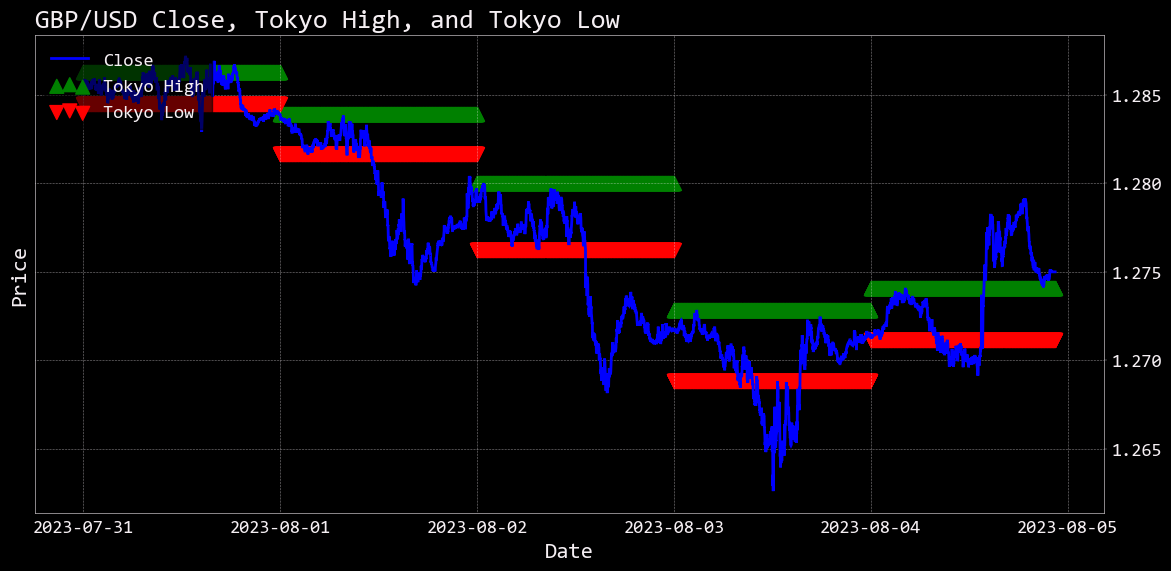

<Figure size 640x480 with 0 Axes>

In [156]:
plt.figure(figsize=(12, 6))
plt.plot(currency_pair.index, currency_pair['Close'], label='Close', color='blue', linewidth=2)
plt.scatter(currency_pair.index, currency_pair['Tokyo High'], label='Tokyo High', color='green', marker='^', s=100)
plt.scatter(currency_pair.index, currency_pair['Tokyo Low'], label='Tokyo Low', color='red', marker='v', s=100)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GBP/USD Close, Tokyo High, and Tokyo Low')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('NoSigsLondonBreakout.png')

plt.close()
plt.clf()

In [157]:
currency_pair["signal"] = 0.0

for i in range(len(currency_pair)):
    if currency_pair["Close"][i] > currency_pair["Tokyo High"][i]:
        currency_pair["signal"][i] = 1.0

    elif currency_pair["Close"][i] < currency_pair["Tokyo Low"][i]:
        currency_pair["signal"][i] = -1.0

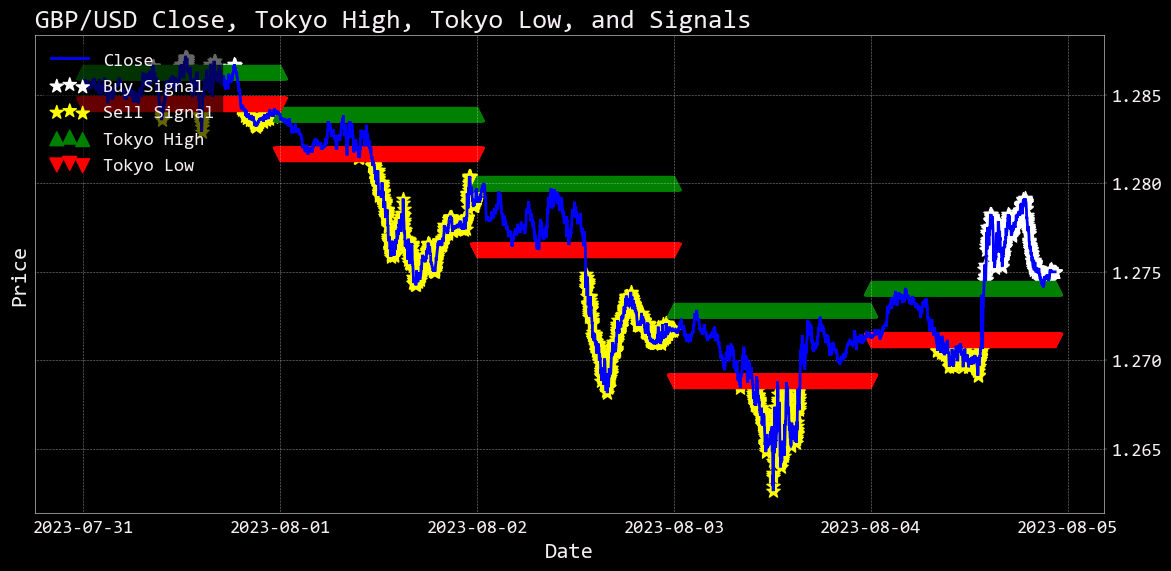

<Figure size 640x480 with 0 Axes>

In [158]:
plt.figure(figsize=(12, 6))
plt.plot(currency_pair.index, currency_pair['Close'], label='Close', color='blue', linewidth=2)
plt.scatter(currency_pair.index[currency_pair['signal'] == 1.0], currency_pair['Close'][currency_pair['signal'] == 1.0], 
            label='Buy Signal', color='white', marker='*', s=100)
plt.scatter(currency_pair.index[currency_pair['signal'] == -1.0], currency_pair['Close'][currency_pair['signal'] == -1.0], 
            label='Sell Signal', color='yellow', marker='*', s=100)
plt.scatter(currency_pair.index, currency_pair['Tokyo High'], label='Tokyo High', color='green', marker='^', s=100)
plt.scatter(currency_pair.index, currency_pair['Tokyo Low'], label='Tokyo Low', color='red', marker='v', s=100)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GBP/USD Close, Tokyo High, Tokyo Low, and Signals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('WithSigsLondonBreakout.png')

plt.close()
plt.clf()